# Produces a Figure Similar to:

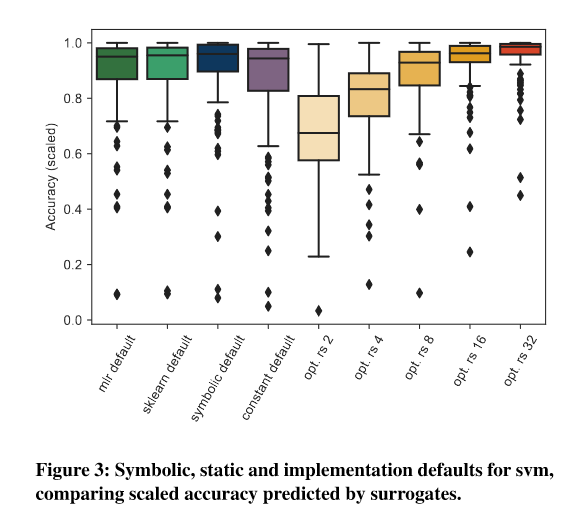

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

surrogate_performance = pd.read_csv("surrogate_performance.csv", sep=';', header=0)
surrogate_performance.sample(5)

,task,learner,optimizer,constants,expression,surrogate_score
379,189924,xgboost,sklearn_default,False,sklearn_default,0.9919
918,190411,glmnet,mupluslambda,False,"make_tuple(if_gt(689, n, sub(truediv(mkd, true...",0.9994
986,14971,knn,mupluslambda,False,"make_tuple(mul(max(m, truediv(19, truediv(mul(...",0.9991
1824,9970,rpart,mupluslambda,True,"make_tuple(0.0004263955220972863, 23, 39, add(...",0.9876
1244,9960,rpart,mupluslambda,False,"make_tuple(sub(if_gt(n, p, 0.00068567761282921...",0.9880


In [33]:
opt_random_search = pd.read_csv("optimistic_random_search.csv", sep=';', header=0)
opt_random_search

,task,learner,optimizer,constants,expression,surrogate_score
0,9960,xgboost,optimistic_random_search_2,False,100 replications,0.876472
1,9960,xgboost,optimistic_random_search_4,False,100 replications,0.941642
2,9960,xgboost,optimistic_random_search_8,False,100 replications,0.979111
3,9960,xgboost,optimistic_random_search_16,False,100 replications,0.992509
4,9960,xgboost,optimistic_random_search_32,False,100 replications,0.996307
...,...,...,...,...,...,...
3290,168912,svm,optimistic_random_search_2,False,100 replications,0.674328
3291,168912,svm,optimistic_random_search_4,False,100 replications,0.874119
3292,168912,svm,optimistic_random_search_8,False,100 replications,0.939477
3293,168912,svm,optimistic_random_search_16,False,100 replications,0.949916


In [34]:
all_methods = pd.concat([surrogate_performance, opt_random_search])

In the plots we want to make distinctions between different optimizers, but also their constraints (e.g. whether symbolic terminals are used). Additionally we want to simply rename the "programming names" more easily interpretable:

In [35]:
def category_from_row(row):
    if '_' in row['optimizer']:
        return row['optimizer'].replace('_', ' ')
    elif row['optimizer'] == "mupluslambda":
        if row['constants']:
            return "constant default"
        else:
            return "symbolic default"
    else:
        raise ValueError(f"Unknown category for {row}")

all_methods["category"] = all_methods.apply(category_from_row, axis=1)

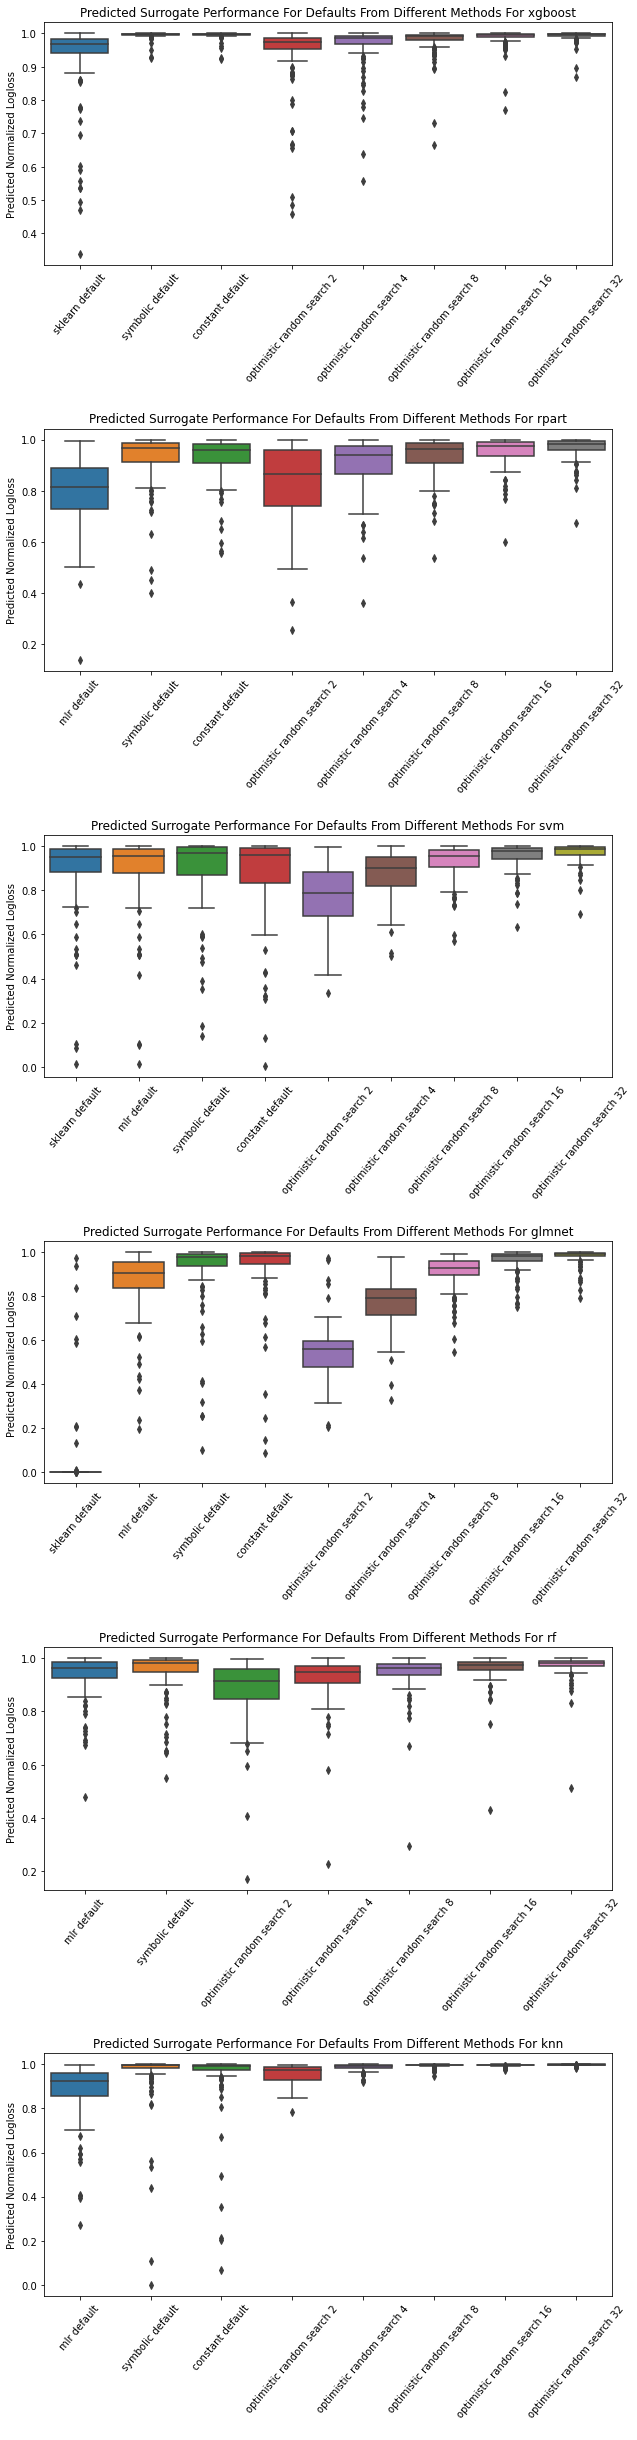

In [41]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(9, 34))
for ax, learner in zip(axes.flatten(), all_methods.learner.unique()):
    # learner = "svm"
    learner_data = all_methods[all_methods.learner == learner]
    sns.boxplot(data=learner_data, x="category", y="surrogate_score", ax=ax)

    ax.set_title(f"Predicted Surrogate Performance For Defaults From Different Methods For {learner}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
    ax.set_xlabel(" ")
    ax.set_ylabel("Predicted Normalized Logloss")

plt.tight_layout()

In [44]:
fig.savefig("figure3.png",facecolor='white', transparent=False)

<AxesSubplot:ylabel='Frequency'>

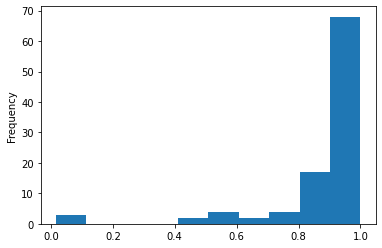

In [10]:
learner_data[learner_data.optimizer == "sklearn_default"].surrogate_score.plot.hist()

In [ ]:
plt.